# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [15]:
import pandas as pd
advertising = pd.read_csv('Advertising 2.csv')
# удалим первый неинформативный столбец с нумерацией строк
advertising = advertising.drop(advertising.columns[0], axis=1)
advertising.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [9]:
advertising.isnull().mean().sort_values()
# пропуски в данных не обнаружены

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [16]:
X = advertising[['TV', 'radio', 'newspaper']].values
y = advertising['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [17]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [18]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [21]:
# напишем функцию, которая реализует координатный спуск по представленным формулам
def coordinate_descent(X, y, max_iters=1000, tolerance=1e-6):
    
    n_samples, n_features = X.shape
    # создадим нулевой вектор
    w = np.zeros(n_features)
    # вычислим начальное значение r
    r = y - X @ w
    
    # создадим цикл по итерациям
    for iter in range(max_iters):
        w_new = np.copy(w)
        for j in range(n_features):
            # вычислим r-j
            r_minus_j = r + X[:, j] * w[j]
            # вычислим обновленный wj
            w[j] = X[:, j] @ r_minus_j
            # вычислим обновленный r
            r = r_minus_j - X[:, j] * w[j]
        
        # проверим на какой итерации произошла сходимость
        if np.linalg.norm(w - w_new) < tolerance:
            print(f'Сходимость произошла на {iter+1} итерации')
            break
    # функция должна возвращать вектор весов
    return w
        

# Применение метода координатного спуска
result = coordinate_descent(X, y)
print("Веса в модели линейной регрессии:", result)

Сходимость произошла на 67 итерации
Веса в модели линейной регрессии: [ 41.56216967 110.1314416   73.52860778  -0.55006305]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [20]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Результаты, полученные путем написания собственной функции, совпадают (до 4 знака после запятой) с результатами, полученными благодаря реализации с помощью библиотеки.

Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [25]:
X = advertising[['TV', 'radio', 'newspaper']].values
X_scaled = (X-np.mean(X))/np.std(X)

**Добавим единичный столбец**

In [26]:
X_scaled = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [27]:
def mse_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [30]:
y_mean = np.mean(y)
y_pred_naive = np.ones(len(y)) * y_mean

mse_naive = mse_error(y, y_pred_naive)
print(f'Среднеквадратичная ошибка для наивного прогноза составляет {mse_naive:.3f}')

Среднеквадратичная ошибка для наивного прогноза составляет 27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [31]:
def lin_pred(X, w):
    y = X @ w
    return y    

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [32]:
# создадим функцию для реализации шага стохастического градиентного спуска
def stoch_grad_step(X, y, w, train_ind, eta):
    # обозначим размер выборки за n
    n = len(X)
    
    x_i = X[train_ind]
    y_i = y[train_ind]
    # вычисляем предсказанное значение
    prediction = w @ x_i
    # вычисляем разницу между предсказанным и реальным
    error = prediction - y_i 
    # вычисляем направление изменения
    grad = x_i * 2 * error / n
    # обновляем веса
    w_new = w - grad * eta
    
    # функция возвращает вектор обновленных весов
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [60]:
# создадим функцию для реализации стохастического градиентного спуска
def stochastic_gradient_descent(X, y, w, eta, max_iter, tolerance):
    w_new = w.copy()
    # расстояние между векторами весов на соседних итерациях (бесконечность)
    prev_w = np.inf
    # пустой список, куда будем добавлять ошибки
    errors = []
    # счетчик итераций
    iteration = 0

    while iteration < max_iter:
        # случайно выбираем индекс объекта
        train_ind = np.random.randint(len(X))
        # на основе этого индекса обновляем веса
        w_new = stoch_grad_step(X, y, w_new, train_ind, eta)
        # рассчитываем среднеквадратичную ошибку
        prediction = X @ w_new
        mse = mse_error(prediction, y)
        # добавляем ошибку в список
        errors.append(mse)

        # вычисляем евклидово расстояние между текущими и предыдущими весами
        dist = np.linalg.norm(w_new - prev_w)

        # останавливаем, если расстояние слишком мало
        if dist < tolerance:
            break
        # обновляем предыдущее значение весов
        prev_w = w_new.copy()
        # увеличиваем счетчик итераций
        iteration += 1

    # функция возвращает вектор весов и вектор ошибок 
    return w_new, errors

# вектор начальных весов, состоящих из нулей
w = np.zeros(X_scaled.shape[1])
# указываем список значений для шага обучения
etas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
for eta in etas:
    # максимальное число итераций 
    max_iter = 100000
    # евклидово расстояние, при котром алгоритм прекращает работу
    tolerance = 1e-6

    # запускаем стохастический градиентный спуск
    w_final, errors = stochastic_gradient_descent(X_scaled, y, w, eta, max_iter, tolerance)

    print(f'Шаг обучения = {eta}, Ошибка составляет {errors[-1]:.3f}')

Шаг обучения = 0.001, Ошибка составляет 68.283
Шаг обучения = 0.005, Ошибка составляет 67.986
Шаг обучения = 0.01, Ошибка составляет 49.300
Шаг обучения = 0.05, Ошибка составляет 18.120
Шаг обучения = 0.1, Ошибка составляет 13.727
Шаг обучения = 0.5, Ошибка составляет 2.828


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

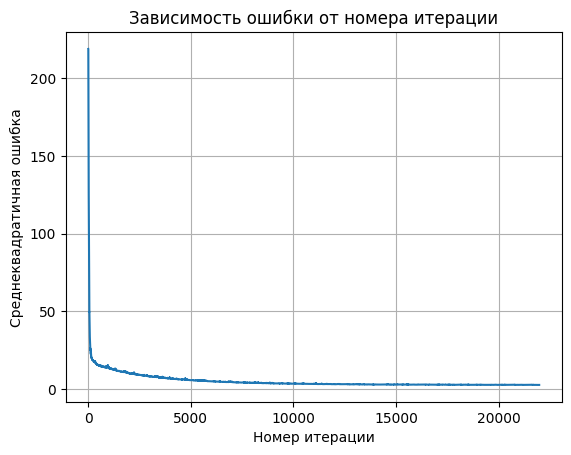

In [61]:
import matplotlib.pyplot as plt

plt.plot(range(len(errors)), errors)

# название по оси Х
plt.xlabel('Номер итерации')
# название по оси Y
plt.ylabel('Среднеквадратичная ошибка')
# название графика 
plt.title('Зависимость ошибки от номера итерации')
# есть сетка на графике
plt.grid(True)

plt.show()

Из моего графика видно, что уже на первых итерациях ошибка сильно снижается, и, начиная с ~15.000 итерации, колебания ее изменений становятся очень незначительны, даже можно сказать, что значение ошибки выходит на плато.
Я проводила несколько экспериментов с числом итераций и со значениями параметра темпа обучения и могу сказать, что увеличивать количество итераций (> 100.000) не имеет смысла, так как именно за это число итераций при шаге обучения 0.5 получается попасть в ошибку ~2.8. Ниже мне не удавалось на разу.

**Выведите вектор весов, к которому сошелся метод.**

In [69]:
print(f'Обновленный вектор весов:', w_final)

Обновленный вектор весов: [17.9803134   3.49234346 13.46268253  0.06915553]


In [68]:
# для сравнения посчитаем веса, пользуясь библиотекой sklearn
model = LinearRegression(fit_intercept=False)
model.fit(X_scaled, y)
print(model.coef_)
# можем заметить, что значения довольно близки к тем, что посчитаны вручную 

[18.55627326  3.51259693 14.47033954 -0.07963123]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [65]:
last_error = errors[-1]
print(f'Среднеквадратичная ошибка на последней итерации составляет {last_error}')

Среднеквадратичная ошибка на последней итерации составляет 2.8276384028071933


In [67]:
# бонусное задание
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# оценка качества модели на основе собственной реализации
prediction_sgd = X_scaled @ w_final
mse_sgd = mean_squared_error(y, prediction_sgd)
mae_sgd = mean_absolute_error(y, prediction_sgd)
r2_sgd = r2_score(y, prediction_sgd)

print("Собственная реализация:")
print("Обновленные веса:", w_final)
print("Среднеквадратичная ошибка:", mse_sgd)
print("Средняя абсолютная ошибка:", mae_sgd)
print("Коэффициент детерминации (R²):", r2_sgd)

# реализация с использованием SGDRegressor из sklearn
sgd_regressor = SGDRegressor(max_iter=max_iter, tol=tolerance, eta0=0.1)
sgd_regressor.fit(X_scaled, y)

# получаем веса из sklearn
w_final_sklearn = sgd_regressor.coef_
w_intercept_sklearn = sgd_regressor.intercept_

# Оценка качества модели из sklearn
prediction_sklearn = sgd_regressor.predict(X_scaled)
mse_sklearn = mean_squared_error(y, prediction_sklearn)
mae_sklearn = mean_absolute_error(y, prediction_sklearn)
r2_sklearn = r2_score(y, prediction_sklearn)

print("\nМодель из sklearn:")
print("Обновленные веса:", w_final_sklearn)
print("Смещение:", w_intercept_sklearn)
print("Среднеквадратичная ошибка:", mse_sklearn)
print("Средняя абсолютная ошибка:", mae_sklearn)
print("Коэффициент детерминации (R²):", r2_sklearn)

Собственная реализация:
Обновленные веса: [17.9803134   3.49234346 13.46268253  0.06915553]
Среднеквадратичная ошибка: 2.8276384028071933
Средняя абсолютная ошибка: 1.2897460425831044
Коэффициент детерминации (R²): 0.8956041809703973

Модель из sklearn:
Обновленные веса: [ 8.95268407  3.35178388 13.39098859  0.24984027]
Смещение: [9.02506968]
Среднеквадратичная ошибка: 2.9398864374589952
Средняя абсолютная ошибка: 1.3597588734399877
Коэффициент детерминации (R²): 0.8914600069839693


Значение метрик (MSE, MAE) различается на 1 знак после запятой